### Sample size estimation

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import json

In [2]:
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rcParams["figure.figsize"] = (20,10)

In [6]:
def plot_perf(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            n = float(line.split()[1])
            k = float(line.split()[2])
            time = float(line.split()[3])
            cost = float(line.split()[4])
            x.append(cost/(m*n + n*k + m*k))
            y.append((cost/time)*1e-9)
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("F/B")
    plt.ylabel("GF/s")
    plt.plot(x,y,'.',color='grey')

In [4]:
def plot_perf_square(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            n = float(line.split()[1])
            k = float(line.split()[2])
            if m==n==k:
                time = float(line.split()[3])
                cost = float(line.split()[4])
                x.append(m)
                y.append((cost/time)*1e-9)
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("size")
    plt.ylabel("GF/s")
    plt.plot(x,y,'.',color='grey')

In [8]:
def get_data(filename):
    data = {}
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            x = line.split()[0] + " " + line.split()[1] + " " + line.split()[2]
            time = float(line.split()[3])
            cost = float(line.split()[4])
            y = (cost/time)*1e-9
            try:
                data[x].append(y)
            except KeyError:
                data[x] = []
                data[x].append(y)

    for k,v in data.items():
        v.sort()
        
    return data

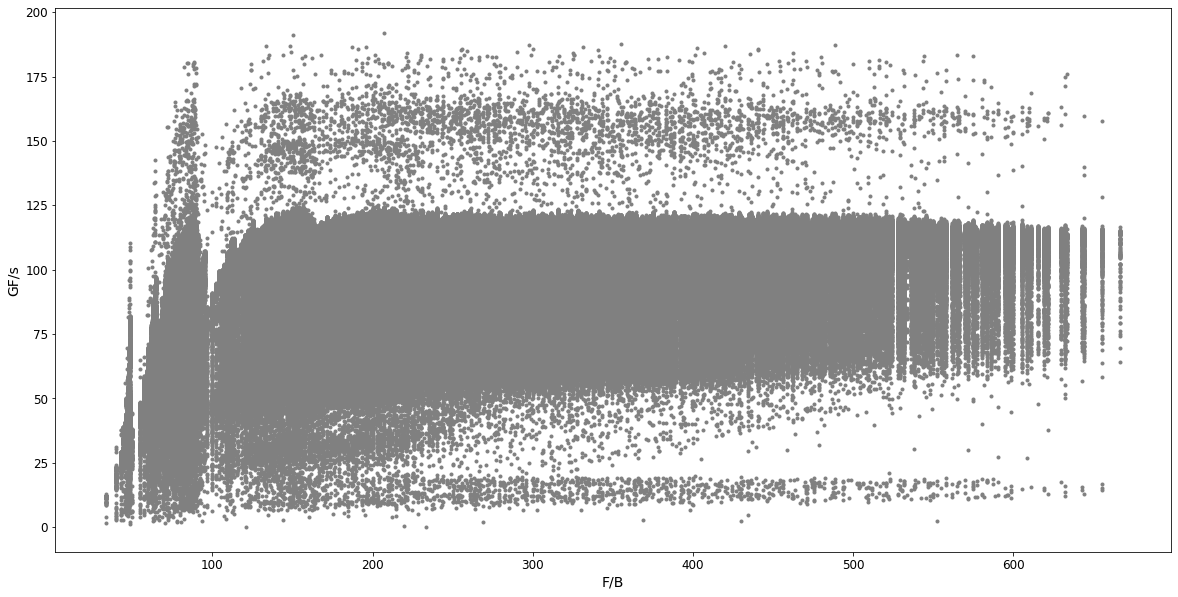

In [77]:
plot_perf("sample_size_estimation/data/gemm_mnk_random2.txt")
plt.show()

In [78]:
filename = "sample_size_estimation/data/gemm_mnk_random2.txt"
data = get_data(filename)

### Sample variance

In [108]:
y = []
x = []
for k,v in data.items():
    m,n,k = map(float,k.split())
    if m==n==k:
        y.append(np.var(v)*(100./99.))
        x.append(m)
zipped = sorted(zip(x,y), key=lambda t: t[0])
x = np.array(zipped)[:,0]
y = np.array(zipped)[:,1]

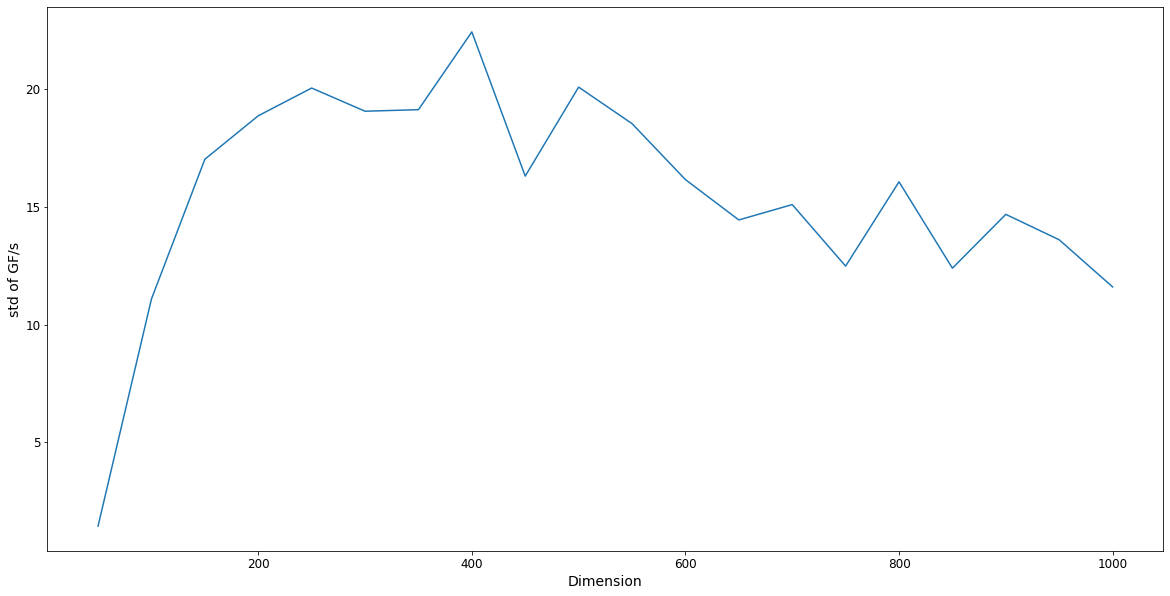

In [120]:
plt.ylabel("std of GF/s")
plt.xlabel("Dimension")
plt.plot(x,np.sqrt(y))

In [114]:
from statistics import variance
variance(data["100 100 100"])

122.94749512183272

In [95]:
np.var(data["100 100 100"])*(100./99.)

122.94749512183273

### Sample size extimation for fixed confidence and precision

Consider an **arbitary distribution** with **true mean** $\mu$ and **true variance** $\sigma$

From CLT, we get the relation of sample mean with the true mean

> $\overline{X} = \mu \pm Z.\sigma_{\overline{X}} \qquad \sigma_{\overline{x}} = \frac{\sigma}{\sqrt{n}}$



> $Z = \pm \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$

> $n = (\frac{Z\sigma}{\overline{X}-\mu})^2 = \frac{Z^2.E[s_{n-1}]}{\epsilon^2} \qquad \sigma^2 = E[s_{n-1}] = E[\frac{n}{n-1}s_n] \qquad s_n = \frac{\sum_i (X_i - \overline{X})^2}{n}$ 


In [66]:
np.var(data["1000 1000 1000"])*(100./99.)*1.96*1.96/(10**2)

5.396807906259875

In [122]:
y = []
x = []
z_val = 2.58
prec = 10.
for k,v in data.items():
    m,n,k = map(float,k.split())
    if m==n==k:
        y.append(np.var(v)*(100./99.)*z_val*z_val/(prec**2))
        x.append(m)
zipped = sorted(zip(x,y), key=lambda t: t[0])
x = np.array(zipped)[:,0]
y = np.array(zipped)[:,1]

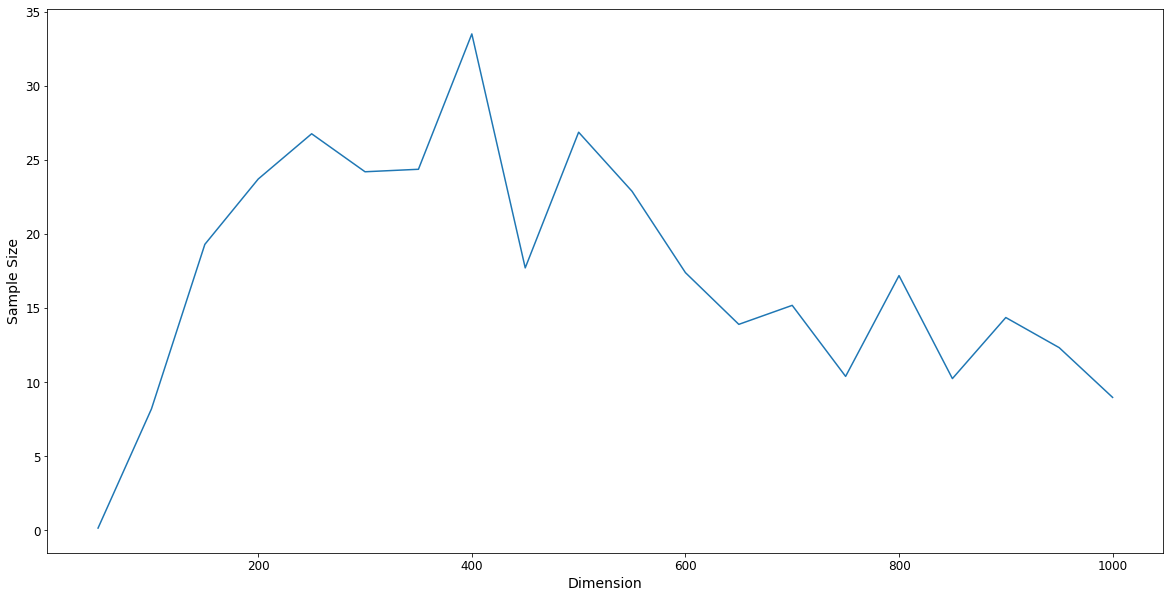

In [123]:
plt.ylabel("Sample Size")
plt.xlabel("Dimension")
plt.plot(x,y)

In [125]:
y = []
x = []
for k,v in data.items():
    m,n,k = map(float,k.split())
    y.append(np.var(v)*(100./99.))
    x.append((2*m*n*k)/(m*n + n*k + m*k))
zipped = sorted(zip(x,y), key=lambda t: t[0])
x = np.array(zipped)[:,0]
y = np.array(zipped)[:,1]

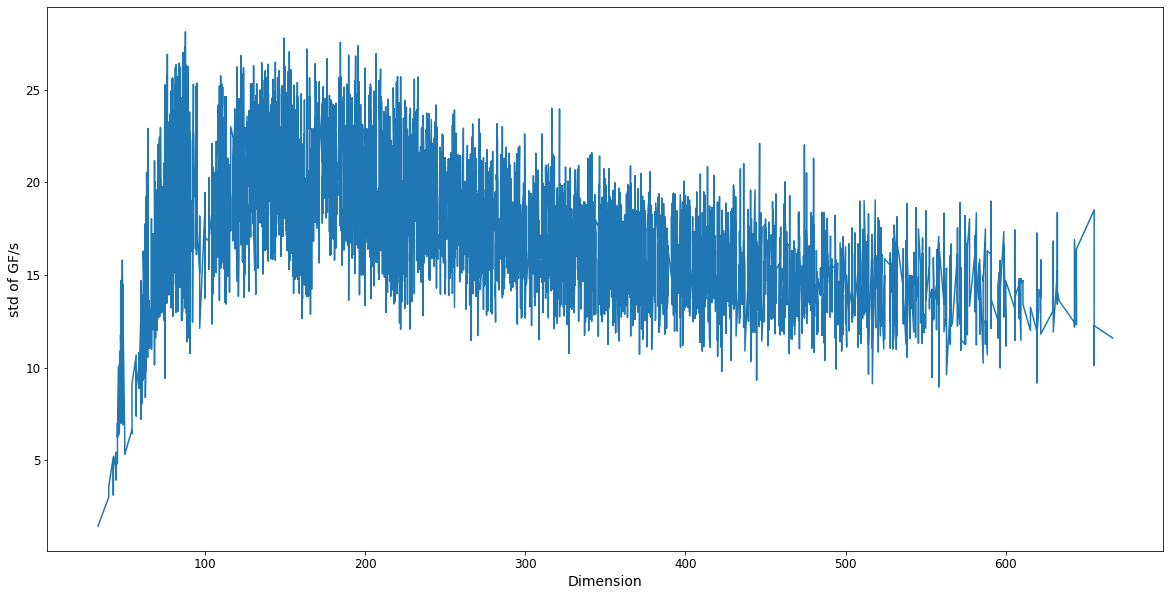

In [127]:
plt.ylabel("std of GF/s")
plt.xlabel("Dimension")
plt.plot(x,np.sqrt(y))

In [128]:
y = []
x = []
z_val = 1.96
prec = 6.
for k,v in data.items():
    m,n,k = map(float,k.split())
    y.append(np.var(v)*(100./99.)*z_val*z_val/(prec**2))
    x.append((2*m*n*k)/(m*n + n*k + m*k))
zipped = sorted(zip(x,y), key=lambda t: t[0])
x = np.array(zipped)[:,0]
y = np.array(zipped)[:,1]

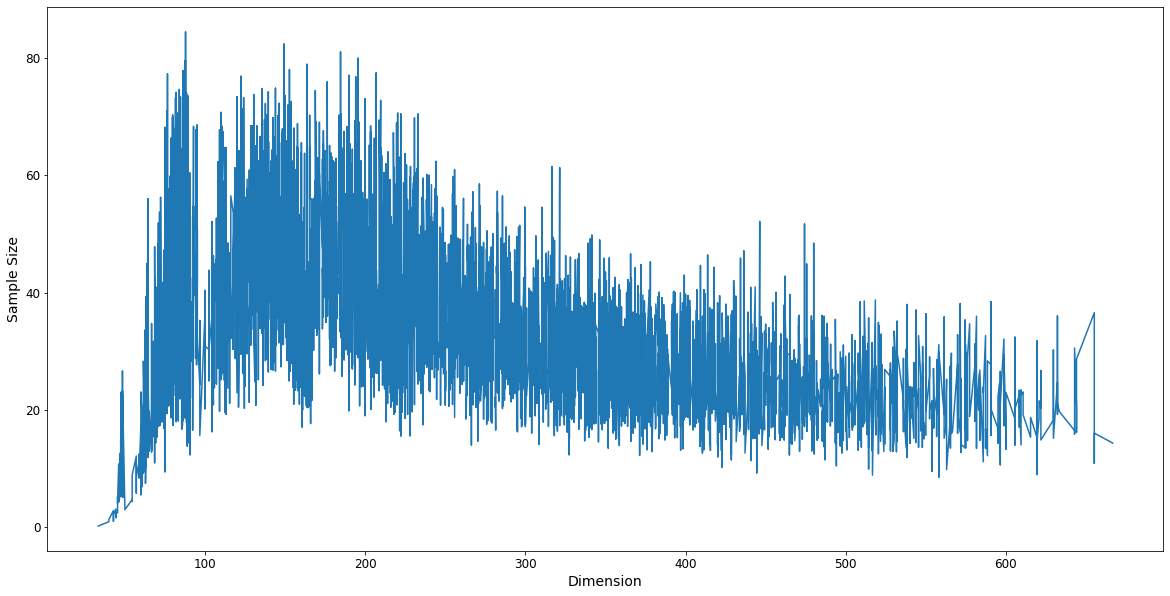

In [129]:
plt.ylabel("Sample Size")
plt.xlabel("Dimension")
plt.plot(x,y)

### Expected precision for fixed sample size 

In [130]:
y = []
x = []
z_val = 1.96
N = 20.
for k,v in data.items():
    m,n,k = map(float,k.split())
    if m==n==k:
        y.append(np.sqrt(np.var(v)*(100./99.)*z_val*z_val/N))
        x.append(m)
zipped = sorted(zip(x,y), key=lambda t: t[0])
x = np.array(zipped)[:,0]
y = np.array(zipped)[:,1]

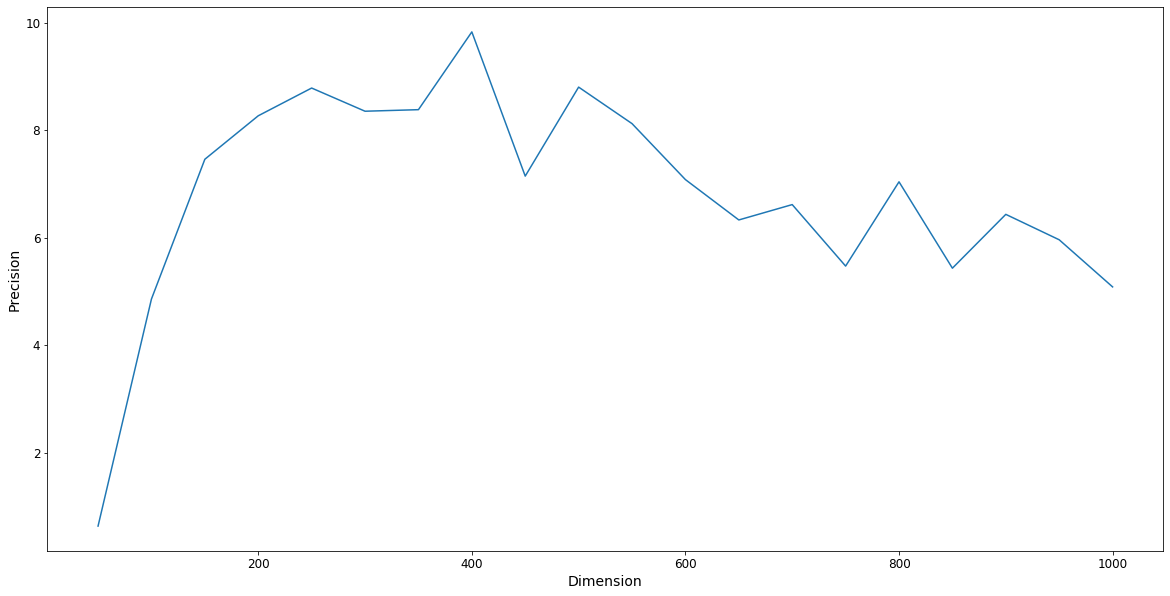

In [131]:
plt.ylabel("Precision")
plt.xlabel("Dimension")
plt.plot(x,y)

In [132]:
y = []
x = []
z_val = 1.96
N = 20.
for k,v in data.items():
    m,n,k = map(float,k.split())
    y.append(np.sqrt(np.var(v)*(100./99.)*z_val*z_val/N))
    x.append((2*m*n*k)/(m*n + n*k + m*k))
zipped = sorted(zip(x,y), key=lambda t: t[0])
x = np.array(zipped)[:,0]
y = np.array(zipped)[:,1]

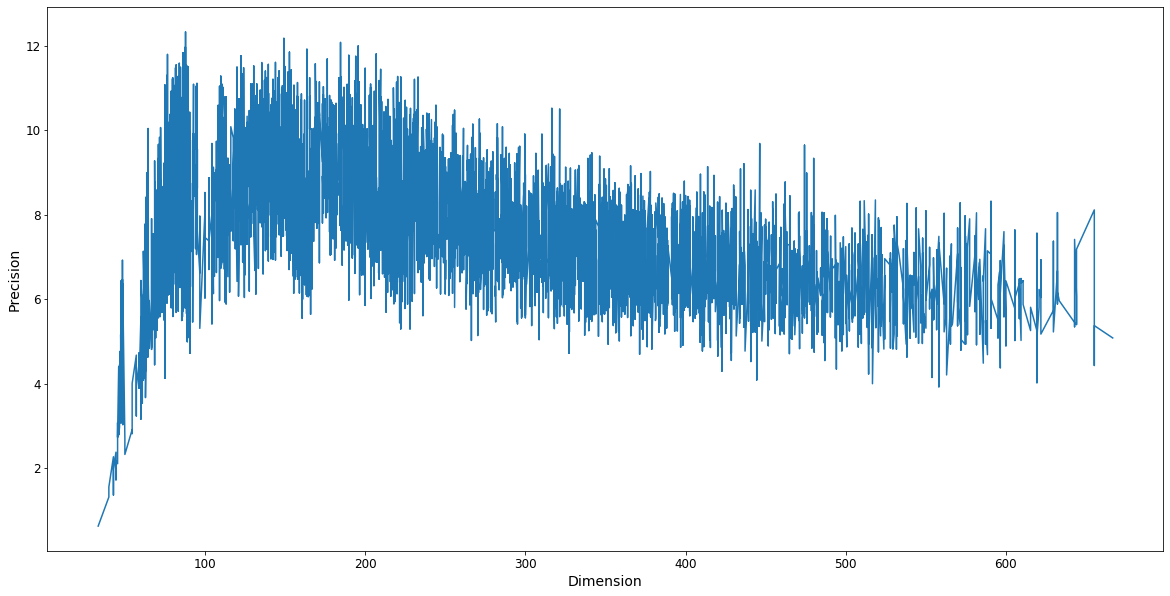

In [133]:
plt.ylabel("Precision")
plt.xlabel("Dimension")
plt.plot(x,y)

In [148]:
y = []
y1 = []
x = []
S = 30
for k,v in data.items():
    m,n,k = map(float,k.split())
    if m==n==k:
        y.append(np.var(v)*(100./99.))
        tmp = []
        for i in range(100):
            vs = random.sample(v,S)
            tmp.append(variance(vs))
        y1.append(np.mean(tmp))
        x.append(m)
zipped = sorted(zip(x,y,y1), key=lambda t: t[0])
x = np.array(zipped)[:,0]
y = np.array(zipped)[:,1]
y1= np.array(zipped)[:,2]

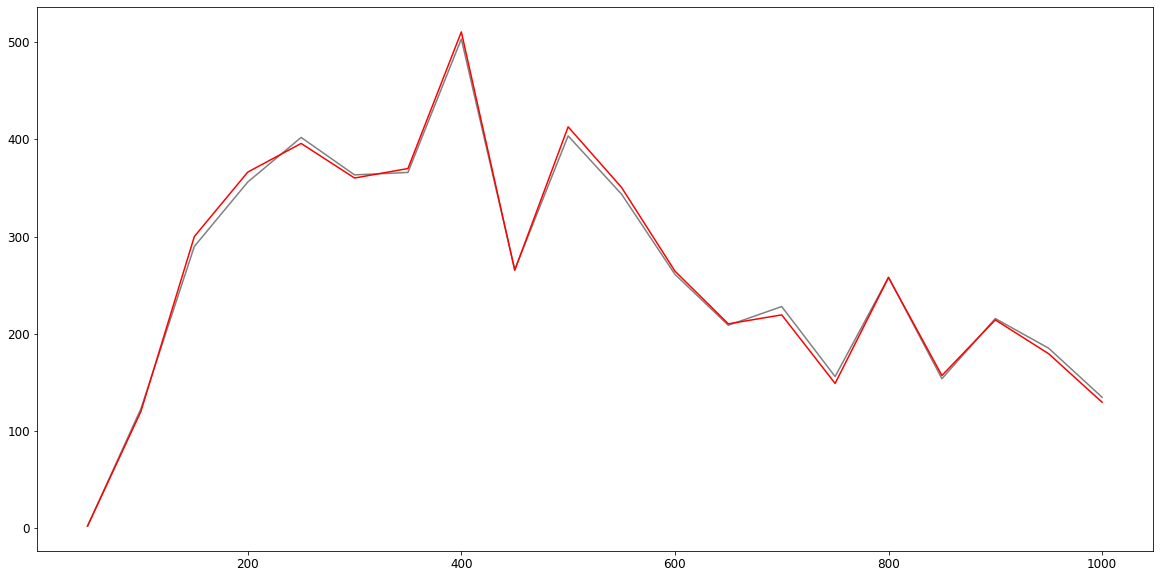

In [149]:
plt.plot(x,y,color='grey')
plt.plot(x,y1,color='r')

In [150]:
zipped

[(50.0, 2.0830384594653357, 2.1304973373898033),
 (100.0, 122.94749512183273, 120.18249842551573),
 (150.0, 289.85187322073097, 300.0613144343246),
 (200.0, 356.12935104014406, 366.33033870586564),
 (250.0, 402.0103765851946, 395.8365855026103),
 (300.0, 363.47819787579107, 360.249042276385),
 (350.0, 365.9984072540851, 370.0057082019502),
 (400.0, 503.2942734833129, 510.6010258962635),
 (450.0, 265.98451554579935, 265.38620501362306),
 (500.0, 403.59216553042705, 412.9301908350751),
 (550.0, 343.68511288602133, 350.6170968083641),
 (600.0, 261.184004286655, 264.4786308820203),
 (650.0, 208.71789123195984, 210.19666387851785),
 (700.0, 227.9856695907843, 219.4272835921324),
 (750.0, 155.9342517417927, 148.90704654961075),
 (800.0, 258.14705140157776, 257.8974473603506),
 (850.0, 153.7178541663588, 157.02389162880826),
 (900.0, 215.63645139544448, 214.28045688834763),
 (950.0, 185.08657748198982, 179.40432326163614),
 (1000.0, 134.635080342697, 129.49738756589505)]